In [140]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.model_selection import KFold


In [141]:
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "BANKRUPT"]

In [142]:
cleaned_df=pd.read_csv("/Users/monalisa/Downloads/cleaned_data.csv")
cleaned_df.head()

,Unnamed: 0,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1,-0.943577,0.000054,0.368583,0.137898,0.040532,0.009772,0.538394,0.059158,0.003440,-0.022715,0.195206,-0.101516,0.055176,0
1,2,-1.170303,-0.000979,0.232118,0.129773,0.037908,0.007736,0.505855,0.057785,0.003145,-0.022708,0.677631,0.167686,1.208515,0
2,3,-0.675053,-0.000610,0.102753,0.131109,0.037908,0.006040,0.373341,0.058470,0.003178,-0.022577,-0.188691,-0.235070,-0.395276,0
3,4,-0.473397,-0.000573,0.549397,0.129773,0.037908,0.001493,0.297050,0.058470,0.003145,-0.022412,0.426924,0.019069,0.093287,0
4,5,-0.610216,0.000141,0.403827,0.133804,0.039875,0.002573,0.390119,0.059848,0.003276,-0.022454,0.209474,0.090797,0.162478,0


In [143]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85972 entries, 0 to 85971
Data columns (total 15 columns):
Unnamed: 0            85972 non-null int64
Tobin's Q             85972 non-null float64
EPS                   85972 non-null float64
Liquidity             85972 non-null float64
Profitability         85972 non-null float64
Productivity          85972 non-null float64
Leverage Ratio        85972 non-null float64
Asset Turnover        85972 non-null float64
Operational Margin    85972 non-null float64
Return on Equity      85972 non-null float64
Market Book Ratio     85972 non-null float64
Assets Growth         85972 non-null float64
Sales Growth          85972 non-null float64
Employee Growth       85972 non-null float64
BK                    85972 non-null int64
dtypes: float64(13), int64(2)
memory usage: 9.8 MB


In [144]:
# dropping passed values 
cleaned_df.drop(["Unnamed: 0"], axis = 1, inplace = True)


In [145]:
max(cleaned_df.isnull().sum())


0

In [146]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85972 entries, 0 to 85971
Data columns (total 14 columns):
Tobin's Q             85972 non-null float64
EPS                   85972 non-null float64
Liquidity             85972 non-null float64
Profitability         85972 non-null float64
Productivity          85972 non-null float64
Leverage Ratio        85972 non-null float64
Asset Turnover        85972 non-null float64
Operational Margin    85972 non-null float64
Return on Equity      85972 non-null float64
Market Book Ratio     85972 non-null float64
Assets Growth         85972 non-null float64
Sales Growth          85972 non-null float64
Employee Growth       85972 non-null float64
BK                    85972 non-null int64
dtypes: float64(13), int64(1)
memory usage: 9.2 MB


In [147]:
#Create independent and Dependent Features
columns = cleaned_df.columns.tolist()
# Filter the columns to remove data we do not want 


In [148]:
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["BK"]]


In [149]:
# Store the variable we are predicting 
target = "BK"


In [150]:
# Define a random state 
state = np.random.RandomState(42)
#X = data[columns]


In [151]:
X = cleaned_df[columns]
print(X.shape)


(85972, 13)


In [152]:
y=cleaned_df[target]

print(y.shape)

(85972,)


In [153]:
#import numpy as np
#X=cleaned_df.iloc[:,0:12].values
#y=cleaned_df.iloc[:,12].values
#print(X[:10])

#print(y[:10])

In [154]:
print(X.shape)
print(y.shape)

(85972, 13)
(85972,)


In [155]:
cleaned_df["Tobin's Q"] =cleaned_df["Tobin's Q"].astype('category').cat.codes
corr_matrix = cleaned_df.corr()
corr_matrix["Tobin's Q"].sort_values(ascending=False)

Tobin's Q             1.000000
Employee Growth       0.073490
Sales Growth          0.048855
Market Book Ratio     0.014874
Asset Turnover        0.003250
EPS                  -0.001719
Leverage Ratio       -0.001876
Assets Growth        -0.010000
BK                   -0.010184
Return on Equity     -0.013854
Operational Margin   -0.069966
Productivity         -0.110240
Liquidity            -0.121838
Profitability        -0.266954
Name: Tobin's Q, dtype: float64

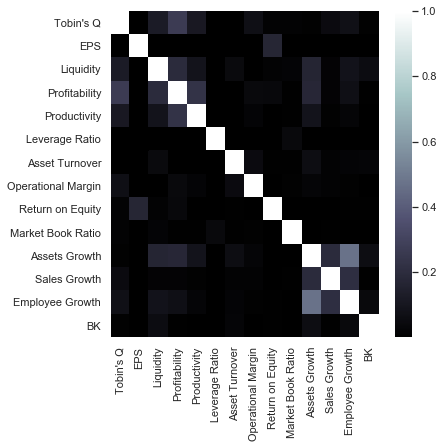

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (6,6))
sns.heatmap(abs(corr_matrix), 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            cmap= "bone")
plt.show()

In [157]:
cleaned_df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

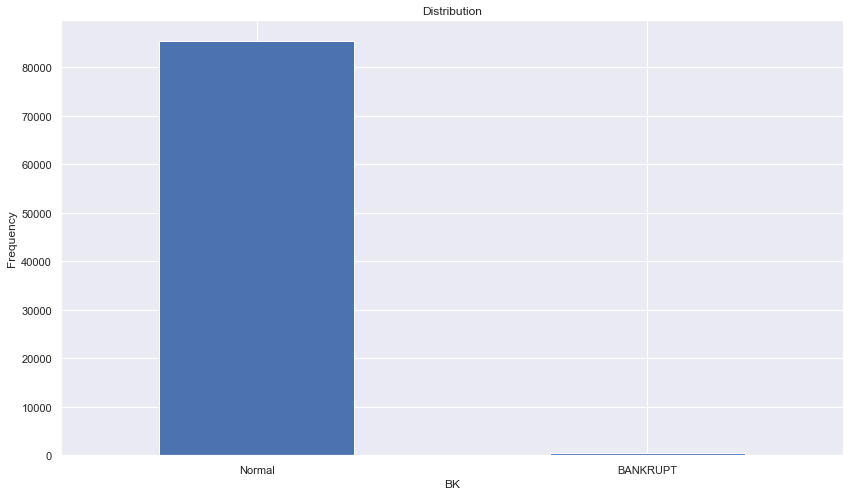

In [158]:
count_classes = pd.value_counts(cleaned_df['BK'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("BK")

plt.ylabel("Frequency")

In [159]:

## Get the BANKRUPT and the normal dataset 

BANKRUPT = cleaned_df[cleaned_df['BK']==1]

Normal = cleaned_df[cleaned_df['BK']==0]

In [160]:

print(BANKRUPT.shape,Normal.shape)

(554, 14) (85418, 14)


In [161]:
#Notes on Standard Scaler

#drop the predicted column
data = cleaned_df.drop(columns=['BK'])
answer = cleaned_df['BK']

In [162]:
from sklearn.preprocessing import StandardScaler
X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=cleaned_df['BK'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)

In [163]:
#X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train_std,y_train)
#X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val_std,y_val)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE, ADASYN

#X_train_under, y_train_under = SMOTEENN(random_state=42).fit_sample(X_train_std,y_train)
#X_val_under, y_val_under = SMOTEENN(random_state=42).fit_sample(X_val_std,y_val)

#X_train_under, y_train_under = SMOTETomek(random_state=42).fit_sample(X_train_std,y_train)
#X_val_under, y_val_under = SMOTETomek(random_state=42).fit_sample(X_val_std,y_val)

X_train_under, y_train_under = BorderlineSMOTE(random_state=42).fit_sample(X_train_std,y_train)
X_val_under, y_val_under = BorderlineSMOTE(random_state=42).fit_sample(X_val_std,y_val)

#X_train_under, y_train_under = ADASYN(random_state=42).fit_sample(X_train_std,y_train)
#X_val_under, y_val_under = ADASYN(random_state=42).fit_sample(X_val_std,y_val)

In [164]:
# Run CV with 5 folds (logit)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [165]:
best_model=logistic_grid.fit(X_train_under, y_train_under)
print('Best Parameters',logistic_grid.best_params_)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print("-------"*10)
means = logistic_grid.cv_results_['mean_test_score']
stds = logistic_grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, logistic_grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.6s finished


Best Parameters {'C': 1.0, 'penalty': 'l2'}
Best Penalty: l2
Best C: 1.0
----------------------------------------------------------------------
0.901 (+/-0.005) for {'C': 1.0, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 21.544346900318832, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 464.15888336127773, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 9999.999999999995, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 215443.46900318822, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 4641588.833612782, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 99999999.9999999, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 2154434690.031878, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 46415888336.12772, 'penalty': 'l2'}
0.901 (+/-0.005) for {'C': 1000000000000.0, 'penalty': 'l2'}


In [166]:
# Fit a Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

In [167]:
import sklearn.metrics as metrics
def roc_scores(X_value, Y_value):
    #in sample
    model_list = [logistic_grid.best_estimator_, 
#                   svm_grid.best_estimator_, 
                  #gnb_best,
                #  rf_grid.best_estimator_,
                 # dummy
                 ]

    model_name = ['Logit','Naive Bayes']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(5,5))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=30)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

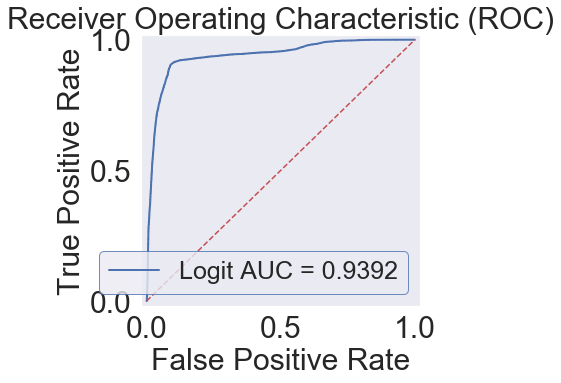

In [168]:
#in sample
roc_scores(X_val_under,y_val_under)

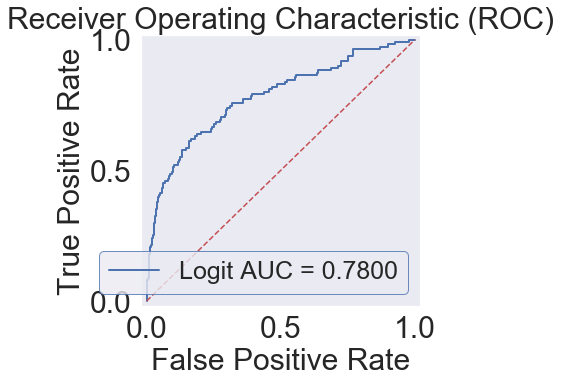

In [169]:
#out of sample
roc_scores(X_test_std,y_test)

In [170]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [171]:
from sklearn.metrics import roc_auc_score,precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
models = [logistic_grid]
model_names = ["Logistic Regression"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,20)
#     print(f'Results for {name}:')
#     print('Best Threshold: ', best_thresh)
#     print('Highest_f1: ', high_f1)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

/Users/monalisa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

In [173]:
#BorderlineSMOTE
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.578947,0.907123,0.907077,0.907574,0.906672


In [187]:
def make_confusion_matrix_val(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    plt.figure(dpi=50)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Normal', 'BankRupt'],
           yticklabels=['Normal', 'BankRupt']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
   

In [181]:
#fixed confusion matrix - random forest, validation
#make_confusion_matrix_val(rf_grid, threshold=0.421)

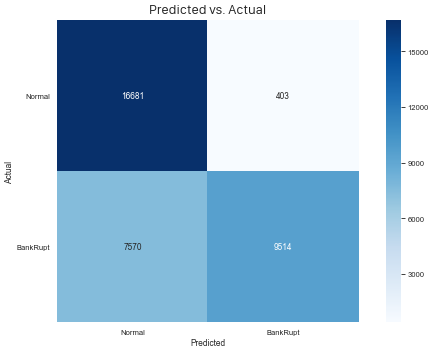

In [188]:
#fixed confusion matrix - logit, validation
from sklearn.metrics import confusion_matrix
make_confusion_matrix_val(logistic_grid, threshold=0.842)

In [177]:
def make_confusion_matrix_test(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=50)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Normal', 'BankRupt'],
           yticklabels=['Normal', 'BankRupt']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [178]:
#fixed confusion matrix - random forest, test
#make_confusion_matrix_test(rf_grid, threshold=0.421)

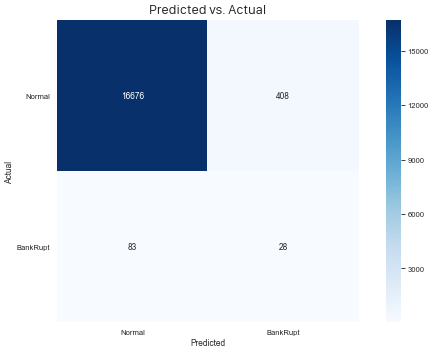

In [179]:
#fixed confusion matrix - logit, test
make_confusion_matrix_test(logistic_grid, threshold=0.842)